### **Problem Statement**
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 --

### **Data**
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 
--
### **Goals of the Case Study**
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 

### **Results Expected**
1. A well-commented Jupyter notebook with at least the logistic regression model, the conversion predictions and evaluation metrics.
2. The word document filled with solutions to all the problems.
3. The overall approach of the analysis in a presentation.
    1. Mention the problem statement and the analysis approach briefly 
    2. Explain the results in business terms
    3. Include visualisations and summarise the most important results in the presentation
A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.
 



# **Approach for Lead Scoring Model**

## **1. Understanding the Problem Statement**
- X Education wants to improve its lead conversion rate from 30% to around 80%.
- The goal is to build a **logistic regression model** to assign a lead score (0-100) based on the likelihood of conversion.
- The dataset consists of multiple attributes related to leads, including categorical and numerical variables.
- The target variable is **‘Converted’** (1 = Converted, 0 = Not Converted).

## **2. Data Preprocessing**
### **2.1 Handling Missing Values**
- Check for missing values in the dataset.
- Handle missing values using appropriate strategies (drop columns with excessive missing data, impute values where necessary).

### **2.2 Handling Categorical Variables**
- Identify categorical variables and explore their unique values.
- Remove the ‘Select’ category as it is equivalent to a null value.
- Convert categorical variables into numerical form using **one-hot encoding** or **label encoding**.

### **2.3 Handling Outliers**
- Detect and remove outliers using boxplots and IQR (Interquartile Range) method for numerical features.
  
### **2.4 Feature Scaling**
- Scale numerical features using **StandardScaler** or **MinMaxScaler** to normalize data for logistic regression.

## **3. Exploratory Data Analysis (EDA)**
- Analyze the distribution of **Converted (target variable)**.
- Visualize relationships between independent variables and the target variable using:
  - **Histograms, boxplots, and bar charts** for categorical variables.
  - **Correlation heatmaps** to check feature relationships.
  - **Pairplots and scatter plots** for numerical variables.
  
## **4. Feature Selection**
- Use **Variance Inflation Factor (VIF)** to check for multicollinearity.
- Perform **Recursive Feature Elimination (RFE)** to select the most important features for the model.
  
## **5. Model Building (Logistic Regression)**
- Split the dataset into **training (70%)** and **testing (30%)** sets.
- Train a **logistic regression model** on the training data.
- Generate lead scores (probabilities of conversion) from the logistic model.

## **6. Model Evaluation**
- Evaluate model performance using:
  - **Accuracy, Precision, Recall, and F1-score**
  - **Confusion matrix**
  - **ROC-AUC Curve** to assess classification performance.
- Optimize the threshold for classification based on business needs.

## **7. Lead Scoring and Business Insights**
- Assign lead scores (scaled probabilities) to each lead.
- Rank leads based on their scores and categorize them as **Hot, Warm, or Cold**.
- Analyze which features influence conversion the most and provide recommendations.

## **8. Summary and Business Recommendations**
- Summarize key findings in business terms.
- Provide actionable insights for improving lead conversion.
- Suggest strategies for future improvements based on the model’s performance.

---


In [68]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
#change pandas display settings to show all columns
pd.set_option('display.max_columns', None)

#change the pandas setting to display max of 200 rows
pd.set_option('display.max_rows', 200)

#change the pandas display settings to format the float values
pd.options.display.float_format = '{:,.2f}'.format  

# **Solution**

## Data inspection

In [70]:
# Importing lead dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [71]:
#check the shape of the data
lead_data.shape

(9240, 37)

In [72]:
#check the null count, data type of each column 
lead_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [73]:
# checking the statistical summary of the data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,"9,240.00","9,240.00","9,103.00","9,240.00","9,103.00","5,022.00","5,022.00"
mean,"617,188.44",0.39,3.45,487.70,2.36,14.31,16.34
std,"23,406.00",0.49,4.85,548.02,2.16,1.39,1.81
min,"579,533.00",0.00,0.00,0.00,0.00,7.00,11.00
25%,"596,484.50",0.00,1.00,12.00,1.00,14.00,15.00
50%,"615,479.00",0.00,3.00,248.00,2.00,14.00,16.00
75%,"637,387.25",1.00,5.00,936.00,3.00,15.00,18.00
max,"660,737.00",1.00,251.00,"2,272.00",55.00,18.00,20.00


In [74]:
#helper function print value counts in categorical columns
def print_value_counts(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            print(data[col].value_counts())
            print('\n')

In [75]:
#checking the value counts of each column
print_value_counts(lead_data)

Prospect ID
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
2a272436-5132-4136-86fa-dcc88c88f482    1
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    1
                                       ..
8bf76a52-2478-476b-8618-1688e07874ad    1
9bc8ce93-6144-49e0-9f9d-080fc980f83c    1
2a369e35-ca95-4ca9-9e4f-9d27175aa320    1
af465dfc-7204-4130-9e05-33231863c4b5    1
cfa0128c-a0da-4656-9d47-0aa4e67bf690    1
Name: count, Length: 9240, dtype: int64


Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call  

1) Handling the 'Select' level that is present in many of the categorical variables.
there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [76]:
# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [77]:
#checking columns with null values along with the percentage of null values and sorting them in descending order
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2).sort_values(ascending=False)



How did you hear about X Education              78.46
Lead Profile                                    74.19
Lead Quality                                    51.59
Asymmetrique Profile Index                      45.65
Asymmetrique Activity Index                     45.65
Asymmetrique Activity Score                     45.65
Asymmetrique Profile Score                      45.65
City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Do Not Email                                     0.00
Lead Origin                 

some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40% .

In [78]:
#getting the columns with more than 40% null values
columns_with_null_values = round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)
columns_with_null_values = columns_with_null_values[columns_with_null_values > 40]
print(columns_with_null_values)

How did you hear about X Education   78.46
Lead Quality                         51.59
Lead Profile                         74.19
Asymmetrique Activity Index          45.65
Asymmetrique Profile Index           45.65
Asymmetrique Activity Score          45.65
Asymmetrique Profile Score           45.65
dtype: float64


In [79]:
#lets drop the columns with more than 40% null values
lead_data = lead_data.drop(columns_with_null_values.index, axis=1)

In [80]:
#lets check the null values again
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2).sort_values(ascending=False)

City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
Page Views Per Visit                             1.48
TotalVisits                                      1.48
Last Activity                                    1.11
Lead Source                                      0.39
Prospect ID                                      0.00
Do Not Call                                      0.00
Lead Origin                                      0.00
Lead Number                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Do Not Email                                     0.00
Search                                           0.00
X Education Forums          

1) Column: 'Specialization'
This column has 37% missing values

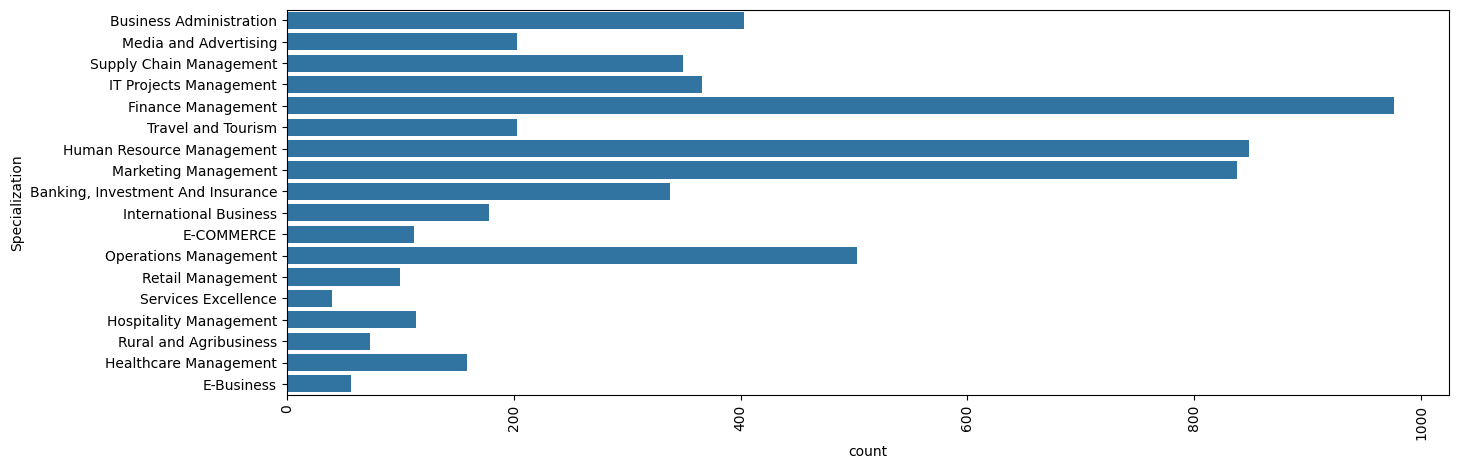

In [81]:
#lets plot the specialisation column to see the distribution of data
plt.figure(figsize=(15,5))
sns.countplot(lead_data['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [82]:
#lets replace the nulls with 'Others' in the Specialization column
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

2) Tags column
'Tags' column has 36% missing values

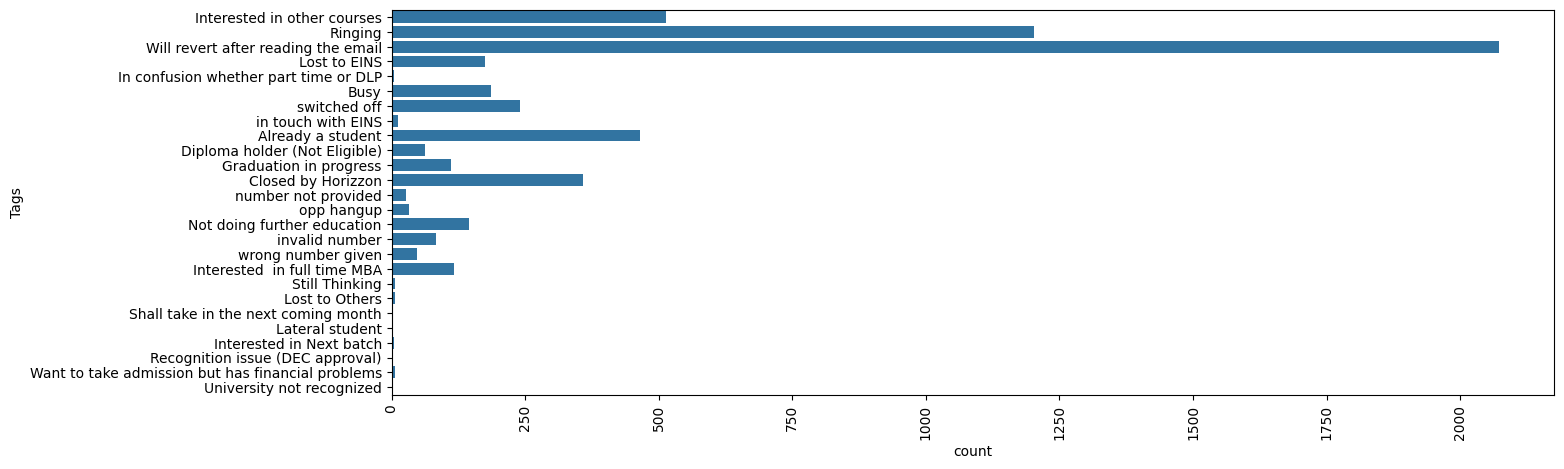

In [83]:
#plotting the Tags column to see the distribution of data
plt.figure(figsize=(15,5))
sns.countplot(lead_data['Tags'])
plt.xticks(rotation=90)
plt.show()

In [84]:
#impute the null values in the Tags column with 'Not Specified'
lead_data['Tags'] = lead_data['Tags'].replace(np.nan, 'Not Specified')
